The Observer Pattern defines a one-to-many dependency between objects so that when one object changes state, all of its dependents are notified and updated automatically.

When state of the one object changes, all of its dependents are notified.

* Subject Object: Source Object - which get all notifications and then these are sent to its list of subscribers

* Listner Object(s): One of many object who get notified of new updates by Subject Object.

* (Un)Subscription: A way to add/remove a Listner to Subject Object's notifiers list.

Advantages:

* Loosely coupled design. Subject and Objects can be modified with out need to bother of implementations and other.


__Kernal: Python3__

In [ ]:
import abc

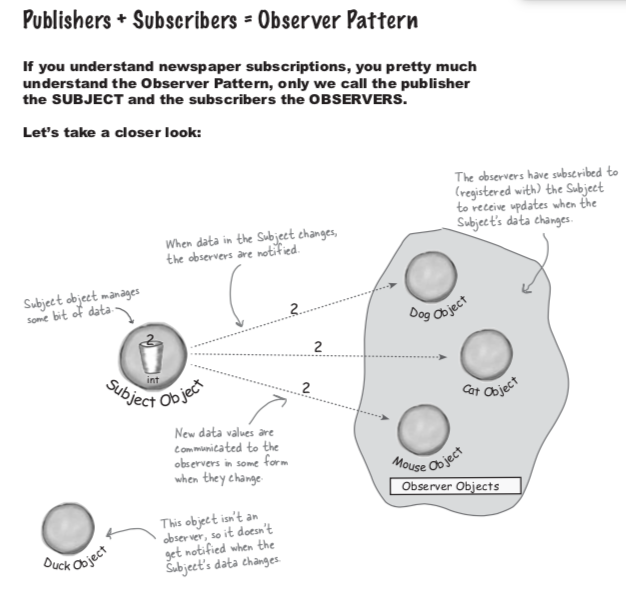

In [1]:
from IPython.display import Image
Image(filename='ObserverPattern.png')

In [ ]:
class Observer(object):
    __metaclass__ = abc.ABCMeta
    
    @abc.abstractmethod
    def update(self, message):
        "Notifications receiver."

class Subject(object):
#     __metaclass__ = abc.ABCMeta
    
    def __init__(self):
        self._observers = list()

    def registerObserver(self, observer: Observer) -> None:
        "Add observer to the list."
        if observer not in self._observers:
            return self._observers.append(observer)

    def unregisterObserver(self, observer: Observer) -> None:
        "To remove observer to the list."
        return self._observers.remove(observer)

#     @abc.abstractmethod
    def notifyObserver(self, message: str) -> None:
        "Notify all the observers."
        for obs in self._observers:
            obs.update(message)



## Use case

* NewsSource: Source class for collecting news
* NewsReader: Reader class for news reader

In [ ]:
class NewsReader(Observer):
    def __init__(self, title='Reader'):
        self.title = title
    def update(self, message):
        print('News Reader: {}'.format(self.title))
        print('Message: {}'.format(str(message)))


class NewsSource(Subject):
     def registerObserver(self, observer: NewsReader):
        assert isinstance(observer, NewsReader), \
            'input object is not instance of NewsReader Class'
        super().registerObserver(observer)
        print('Added a observer')
    
     def unregisterObserver(self, observer: NewsReader):
        assert isinstance(observer, NewsReader), \
            'input object is not instance of NewsReader Class'
        super().unregisterObserver(observer)
        print('Removed a observer')

In [ ]:
tech_news = NewsSource()

In [ ]:
reader1 = NewsReader('Reader1')
reader2 = NewsReader('Reader2')
reader3 = NewsReader('Reader3')

In [ ]:
tech_news.registerObserver(reader1)
tech_news.registerObserver(reader2)

In [ ]:
try:
    tech_news.registerObserver('reader2') ## should fail
    assert False, 'NewsSource should accept only NewsReader objects'
except:
    pass

In [ ]:
tech_news._observers

In [ ]:
tech_news.notifyObserver('helloworld')

In [ ]:
tech_news.registerObserver(reader3)
tech_news.unregisterObserver(reader2)

In [ ]:
tech_news.notifyObserver('helloworld')